# Thư viện


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
cd /content/drive/MyDrive/CDTN K2 Chủ đề 9

/content/drive/.shortcut-targets-by-id/1IoTQsqKHS8ZjHgCCb4H_fhTM227v2DdF/CDTN K2 Chủ đề 9


In [ ]:
ls

bang3.csv         data_merged.xlsx  KLTN/     Nganh.csv         TEST3.pptx    tonghop.csv
DanhSachMon.xlsx  data_moi_moi.csv  KLTN.zip  test2_viet.ipynb  TEST4-1.pptx


In [ ]:
df = pd.read_csv('data_moi_moi.csv',header=[0,1,2],index_col=0)

In [ ]:
nganh_pop = df.pop('Ngành')
df.insert(0,'Ngành',nganh_pop)

khoa_pop = df.pop('Khóa')
df.insert(1,'Khóa',khoa_pop)

grade_pop = df.pop('Grade')
df['Grade'] = grade_pop

gpa_pop = df.pop('GPA')
df['GPA'] = gpa_pop

In [ ]:
df

Tên HP,Ngành,Khóa,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,...,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản,Grade,GPA
Số TC,,,2,2,3,2,2,2,2,2,...,4,4,3,2,3,2,2,2,,
Mã HP,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,CF212B,MI414,...,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311,,
0,T,10,5.0,8.0,5.0,6.0,6.0,3.8,3.2,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5.882653
1,T,10,5.0,6.1,5.7,1.0,NaN,0.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6.257843
2,T,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0.000000
3,T,8,5.0,0.0,6.0,NaN,6.0,5.0,-1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6.071831
4,TA,33,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,7.257447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,TT,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,6.953846
2957,TT,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5.987500


In [ ]:
df['Khóa'] = (df['Khóa']).astype(int)
df = (df.sort_values(by='Khóa'))

In [ ]:
df = df.reset_index(drop=True)
df

Tên HP,Ngành,Khóa,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,...,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản,Grade,GPA
Số TC,,,2,2,3,2,2,2,2,2,...,4,4,3,2,3,2,2,2,,
Mã HP,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,CF212B,MI414,...,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311,,
0,T,8,5.0,0.0,6.0,NaN,6.0,5.0,-1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6.071831
1,T,10,5.0,8.0,5.0,6.0,6.0,3.8,3.2,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5.882653
2,T,10,5.0,6.1,5.7,1.0,NaN,0.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6.257843
3,T,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0.000000
4,TI,13,6.0,4.0,1.0,5.0,NaN,5.0,-1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5.664286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,8.670833
2957,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,7.813636


# Khám phá dữ liệu

## Các ngành và khóa trong bộ dữ liệu

In [ ]:
df.Grade.value_counts()

Grade
C    1394
B    1318
A     137
F      78
D      34
Name: count, dtype: int64

In [ ]:
df.Grade.unique()

array(['C', 'F', 'B', 'D', 'A'], dtype=object)

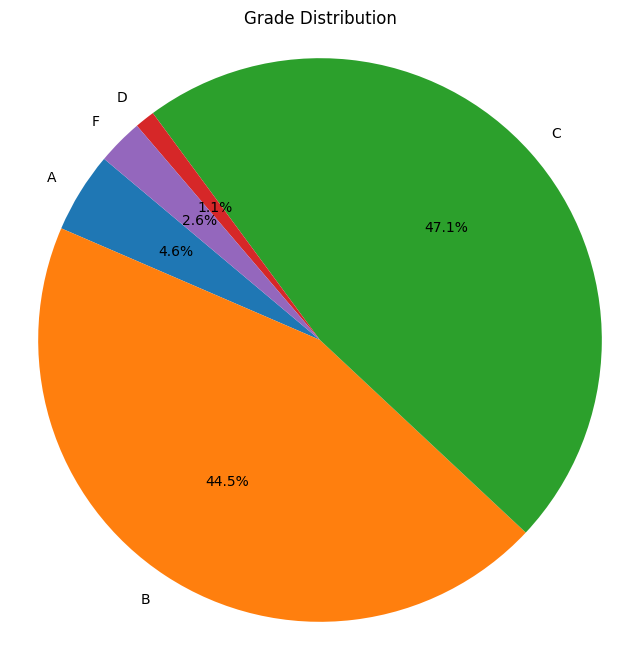

In [ ]:
labels = sorted(df.Grade.unique())
sizes = df.Grade.value_counts().sort_index()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Grade Distribution')
plt.show()

In [ ]:
df['Khóa'].value_counts()

Khóa
33    451
35    425
34    418
36    381
32    242
31    152
19    118
27     95
18     89
20     80
17     76
26     74
30     68
28     57
29     55
21     40
24     37
25     30
23     26
16     12
22     11
14      9
15      7
13      4
10      3
8       1
Name: count, dtype: int64

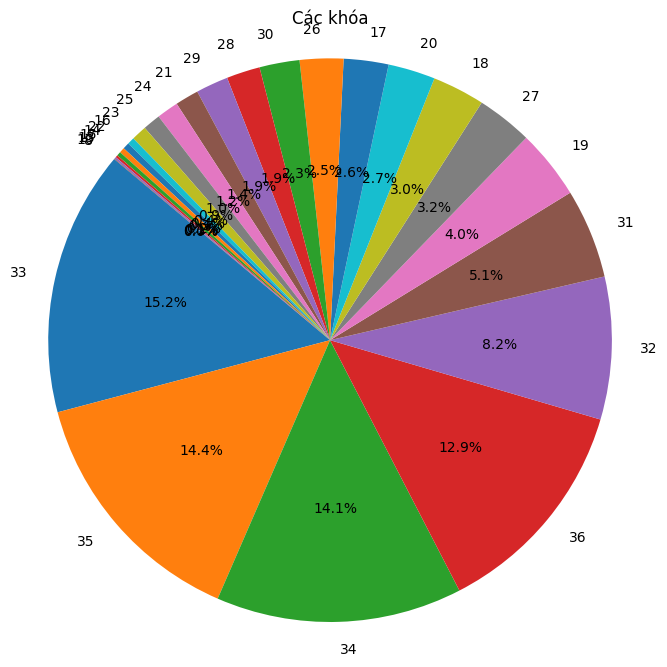

In [ ]:
labels = df['Khóa'].value_counts().index
sizes = df['Khóa'].value_counts().values


# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Các khóa')
plt.show()

In [ ]:
df['Ngành'].value_counts()


Ngành
TI    978
TT    960
TE    445
TC    314
TA    205
TM     55
T       4
Name: count, dtype: int64

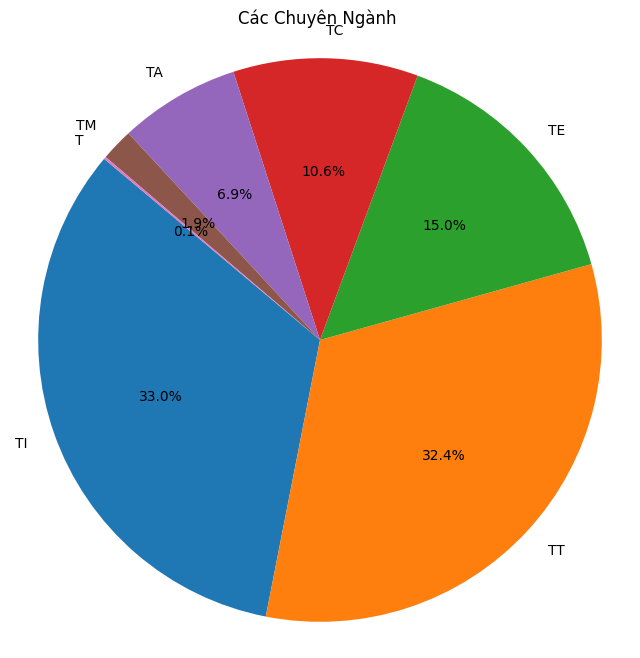

In [ ]:
labels = df['Ngành'].value_counts().index
sizes = df['Ngành'].value_counts().values


# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Các Chuyên Ngành ')
plt.show()

In [ ]:
np.where(df.columns.get_level_values('Mã HP')== 'MA110A')

(array([12]),)

## Sắp xếp dữ liệu theo Ngành học


### Lọc ra chỉ số các cột chứa CTDT của ngành TI

In [ ]:
ma_mon_tong_hop = pd.read_csv('tonghop.csv')
ma_mon_tong_hop = ma_mon_tong_hop.sort_values('Khóa')
ma_mon_tong_hop

,Mã HP,Tên HP,Điểm,Số TC,Ngành,Khóa,Kiểu môn
125,MA111B,Giải tích 2B,4.0,2,T,8,NaN
123,MA110A,Giải tích 1A,4.0,2,T,8,NaN
122,IS224A,Cơ sở dữ liệu phân tán,6.0,2,T,8,NaN
121,GJ102,Tiếng Nhật 2,3.2,2,T,8,NaN
120,GJ101,Tiếng Nhật 1,6.0,2,T,8,NaN
...,...,...,...,...,...,...,...
16934,NA151,Khoa học môi trường,8.8,2,TC,36,NaN
16935,SH131,Pháp luật đại cương,8.9,2,TC,36,NaN
16936,CS100,Tin đại cương,4.5,2,TC,36,NaN
16938,MA101,"Logic, suy luận toán học và kỹ thuật đếm",5.3,3,TC,36,NaN


In [ ]:
bang3 = pd.read_csv('bang3.csv')

In [ ]:
len(ma_mon_tong_hop['Mã HP'].unique())

544

In [ ]:
len(bang3['Mã HP'].unique())

170

In [ ]:
ma_mon_tong_hop = ma_mon_tong_hop.drop(columns='Điểm')
ma_mon_tong_hop

,Mã HP,Tên HP,Số TC,Ngành,Khóa,Kiểu môn
125,MA111B,Giải tích 2B,2,T,8,NaN
123,MA110A,Giải tích 1A,2,T,8,NaN
122,IS224A,Cơ sở dữ liệu phân tán,2,T,8,NaN
121,GJ102,Tiếng Nhật 2,2,T,8,NaN
120,GJ101,Tiếng Nhật 1,2,T,8,NaN
...,...,...,...,...,...,...
16934,NA151,Khoa học môi trường,2,TC,36,NaN
16935,SH131,Pháp luật đại cương,2,TC,36,NaN
16936,CS100,Tin đại cương,2,TC,36,NaN
16938,MA101,"Logic, suy luận toán học và kỹ thuật đếm",3,TC,36,NaN


In [ ]:
ma_mon_tong_hop = ma_mon_tong_hop.drop_duplicates(subset=['Mã HP', 'Tên HP', 'Ngành', 'Khóa'])
ma_mon_tong_hop

,Mã HP,Tên HP,Số TC,Ngành,Khóa,Kiểu môn
125,MA111B,Giải tích 2B,2,T,8,NaN
123,MA110A,Giải tích 1A,2,T,8,NaN
122,IS224A,Cơ sở dữ liệu phân tán,2,T,8,NaN
121,GJ102,Tiếng Nhật 2,2,T,8,NaN
120,GJ101,Tiếng Nhật 1,2,T,8,NaN
...,...,...,...,...,...,...
6622,GE231,Tiếng Anh trung cấp 1,2,TA,36,NaN
6529,NA151,Khoa học môi trường,2,TA,36,NaN
16966,GE222,Tiếng Anh sơ trung cấp 2,2,TC,36,NaN
16967,GE231,Tiếng Anh trung cấp 1,2,TC,36,NaN


In [ ]:
data_merged = pd.merge(ma_mon_tong_hop, bang3[['Mã HP', 'Ngành','Kiểu môn']], on=['Mã HP', 'Ngành'], how='left')
if 'Kiểu môn_y' in data_merged.columns:
    data_merged['Kiểu môn'] = data_merged['Kiểu môn_y'].combine_first(data_merged['Kiểu môn_x'])
    data_merged = data_merged.drop(columns=['Kiểu môn_x', 'Kiểu môn_y'])

# Display the first few rows of the merged dataframe
data_merged

,Mã HP,Tên HP,Số TC,Ngành,Khóa,Kiểu môn
0,MA111B,Giải tích 2B,2,T,8,NaN
1,MA110A,Giải tích 1A,2,T,8,NaN
2,IS224A,Cơ sở dữ liệu phân tán,2,T,8,NaN
3,GJ102,Tiếng Nhật 2,2,T,8,NaN
4,GJ101,Tiếng Nhật 1,2,T,8,NaN
...,...,...,...,...,...,...
19875,GE231,Tiếng Anh trung cấp 1,2,TA,36,NaN
19876,NA151,Khoa học môi trường,2,TA,36,NaN
19877,GE222,Tiếng Anh sơ trung cấp 2,2,TC,36,NaN
19878,GE231,Tiếng Anh trung cấp 1,2,TC,36,NaN


In [ ]:
data_merged = data_merged.drop_duplicates(subset=['Mã HP', 'Tên HP', 'Ngành', 'Khóa'])

In [ ]:
data_merged['Kiểu môn'].value_counts()

Kiểu môn
1.0    1898
0.0     372
Name: count, dtype: int64

In [ ]:
data_merged.loc[data_merged['Tên HP']=='Tin đại cương']

,Mã HP,Tên HP,Số TC,Ngành,Khóa,Kiểu môn
4895,CS100,Tin đại cương,2,TE,20,1.0
5316,CS100,Tin đại cương,2,TC,20,1.0
5445,CS100,Tin đại cương,2,TI,20,1.0
5875,CS100,Tin đại cương,2,TM,20,1.0
6142,CS100,Tin đại cương,2,TC,21,1.0
...,...,...,...,...,...,...
19786,CS100,Tin đại cương,2,TT,36,1.0
19792,CS100,Tin đại cương,2,TI,36,1.0
19819,CS100,Tin đại cương,2,TA,36,NaN
19838,CS100,Tin đại cương,2,TE,36,1.0


In [ ]:
# data_merged.to_csv("data_merged.csv")

In [ ]:
mon_hoc_theo_nganh = {}
cac_nganh = ma_mon_tong_hop['Ngành'].unique()
for nganh in cac_nganh:
    mon_hoc_theo_nganh[nganh] = set(ma_mon_tong_hop[ma_mon_tong_hop['Ngành'] == nganh]['Mã HP'])

In [ ]:

ten_mon_hoc_theo_nganh = {}
cac_nganh = ma_mon_tong_hop['Ngành'].unique()
for nganh in cac_nganh:
    ten_mon_hoc_theo_nganh[nganh] = set(ma_mon_tong_hop[ma_mon_tong_hop['Ngành'] == nganh]['Tên HP'])

In [ ]:
mon_hoc_theo_khoa = {}
cac_khoa = ma_mon_tong_hop['Khóa'].unique()
for khoa in cac_khoa:
    mon_hoc_theo_khoa[khoa] = set(ma_mon_tong_hop[ma_mon_tong_hop['Khóa'] == khoa]['Mã HP'])

In [ ]:
np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TI'])))[0]

array([  2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  61,  62,  63,  64,  67,  68,  70,  71,  72,
        74,  75,  76,  78,  79,  80,  81,  83,  87,  88,  91,  92,  93,
        94,  97,  98,  99, 100, 101, 104, 107, 109, 111, 112, 113, 114,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 203, 204, 207, 209, 210, 212, 214, 21

In [ ]:
df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TI']

Tên HP,Ngành,Khóa,Grade,GPA
Số TC,,,,
Mã HP,,,,
4,TI,13,C,5.664286
5,TI,13,C,6.056604
6,TI,13,C,6.183495
7,TI,13,C,5.891509
8,TI,14,C,5.589535
...,...,...,...,...
2954,TI,36,B,8.243750
2955,TI,36,B,6.966667


In [ ]:
df.loc[df['Ngành']=='TI'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TI'])))[0]]

Tên HP,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,Giáo dục quốc phòng,Giáo dục thể chất,Giải tích 1A,...,GDTC: Bóng chuyền nâng cao,Giáo dục thể chất,Lý thuyết kiểm toán,Lập trình quản lý 1,Lập trình quản lý 2,Nghiệp vụ kiểm toán,Quản trị tài chính doanh nghiệp 2,Tin quản lý 2,Project,Dữ liệu lớn
Số TC,2,2,3,2,2,2,2,4,4,2,...,1,4,2,2,2,2,3,2,3,3
Mã HP,CF302B,SE302,IS222,IS223A,CF212A,CF212B,MI414,PG121,PG100,MA110A,...,PG116,PG100A,AC361A,IS202A,IS202B,AC361B,FN313,IS201B,SE380,IS329
4,6.0,4.0,1.0,5.0,5.0,-1.0,5.0,6.0,7.5,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7.0,-1.0,8.0,5.0,5.0,3.0,8.0,7.1,6.4,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,4.0,5.0,6.3,4.0,1.8,7.0,6.1,6.5,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6.5,6.2,4.5,5.5,5.0,NaN,4.0,7.4,7.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7.0,5.0,0.0,0.0,NaN,5.0,6.0,6.3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TI'],df.loc[df['Ngành']=='TI'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TI'])))[0]]],axis=1)

Tên HP,Ngành,Khóa,Grade,GPA,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,...,GDTC: Bóng chuyền nâng cao,Giáo dục thể chất,Lý thuyết kiểm toán,Lập trình quản lý 1,Lập trình quản lý 2,Nghiệp vụ kiểm toán,Quản trị tài chính doanh nghiệp 2,Tin quản lý 2,Project,Dữ liệu lớn
Số TC,,,,,2,2,3,2,2,2,...,1,4,2,2,2,2,3,2,3,3
Mã HP,,,,,CF302B,SE302,IS222,IS223A,CF212A,CF212B,...,PG116,PG100A,AC361A,IS202A,IS202B,AC361B,FN313,IS201B,SE380,IS329
4,TI,13,C,5.664286,6.0,4.0,1.0,5.0,5.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TI,13,C,6.056604,7.0,-1.0,8.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TI,13,C,6.183495,6.0,4.0,5.0,6.3,4.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TI,13,C,5.891509,6.5,6.2,4.5,5.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TI,14,C,5.589535,NaN,7.0,5.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,TI,36,B,8.243750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,TI,36,B,6.966667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Các ngành

In [ ]:
TI = pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TI'],df.loc[df['Ngành']=='TI'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TI'])))[0]]],axis=1)

TT = pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TT'],df.loc[df['Ngành']=='TT'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TT'])))[0]]],axis=1)

TE = pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TE'],df.loc[df['Ngành']=='TE'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TE'])))[0]]],axis=1)

TC = pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TC'],df.loc[df['Ngành']=='TC'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TC'])))[0]]],axis=1)

TA = pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TA'],df.loc[df['Ngành']=='TA'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TA'])))[0]]],axis=1)

TM = pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='TM'],df.loc[df['Ngành']=='TM'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['TM'])))[0]]],axis=1)

T  =   pd.concat([df.iloc[:,[0,1,-2,-1]].loc[df['Ngành']=='T'],df.loc[df['Ngành']=='T'].iloc[:,np.where(np.isin(df.columns.get_level_values('Mã HP'),list(mon_hoc_theo_nganh['T'])))[0]]],axis=1)

In [ ]:
T

Tên HP,Ngành,Khóa,Grade,GPA,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,...,Giải tích 1,Hệ quản trị cơ sở dữ liệu,Toán cơ sở,Trí tuệ nhân tạo,Xác suất thống kê ứng dụng,Giải tích 2B,Ngôn ngữ lập trình 1A,Tiếng Pháp 1,Tiếng Pháp 2,Tiếng Pháp 3
Số TC,,,,,2,2,3,2,2,2,...,3,3,3,3,4,2,2,2,2,2
Mã HP,,,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,...,MA110,IS322,MA102,MI321,MA231,MA111B,CS121A,GF101,GF102,GF223
0,T,8,C,6.071831,5.0,0.0,6.0,NaN,6.0,5.0,...,NaN,1.2,NaN,NaN,2.0,4.0,4.0,4.4,6.5,5.0
1,T,10,C,5.882653,5.0,8.0,5.0,6.0,6.0,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T,10,C,6.257843,5.0,6.1,5.7,1.0,NaN,0.0,...,5.0,5.0,3.5,2.5,7.0,NaN,NaN,NaN,NaN,NaN
3,T,10,F,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


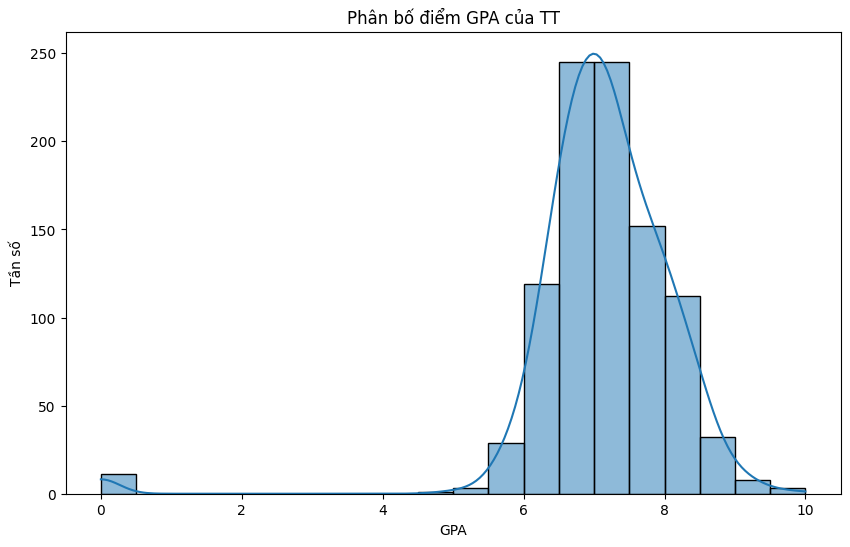

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(TT['GPA'], kde=True, bins=20)

plt.title('Phân bố điểm GPA của TT')
plt.xlabel('GPA')
plt.ylabel('Tần số')

plt.show()

In [ ]:
cac_nganh

array(['T', 'TI', 'TE', 'TC', 'TM', 'TT', 'TA'], dtype=object)

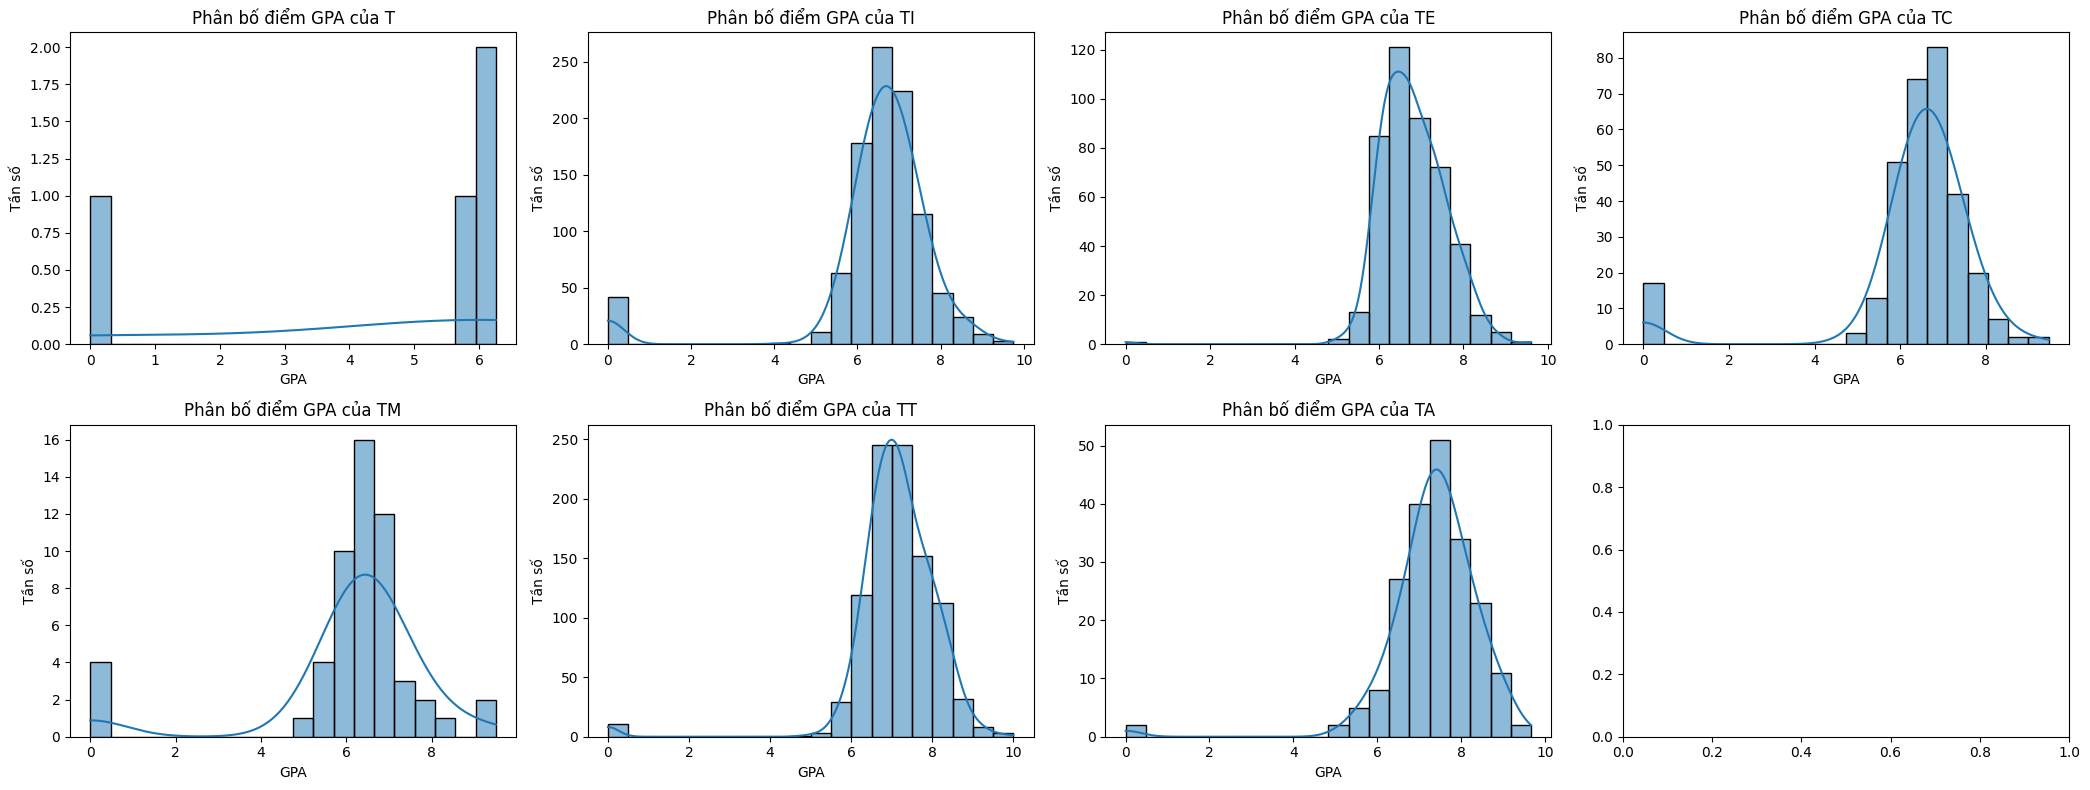

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(21, 8))
axs = axs.ravel()

for i, df in enumerate([T, TI, TE, TC, TM, TT, TA]):
    sns.histplot(df['GPA'], bins=20, ax=axs[i], kde=True)
    axs[i].set_title(f'Phân bố điểm GPA của {cac_nganh[i]}')
    axs[i].set_xlabel('GPA')
    axs[i].set_ylabel('Tần số')

plt.tight_layout()
plt.show()


In [ ]:
TI = TI.sort_values('Grade')
T = T.sort_values('Grade')
TE = TE.sort_values('Grade')
TC = TC.sort_values('Grade')
TM = TM.sort_values('Grade')
TT = TT.sort_values('Grade')
TA = TA.sort_values('Grade')


In [ ]:
TE.columns[np.where(TE.describe().loc['count']>200)]

MultiIndex([(                             'Ngành',  '',       ''),
            (                              'Khóa',  '',       ''),
            (                               'GPA',  '',       ''),
            (                 'Chương trình dịch', '2', 'CF302B'),
            (                'Cấu trúc dữ liệu 2', '2', 'CF212B'),
            (               'Giao diện người máy', '2',  'MI414'),
            (                     'Hàm biến phức', '2',  'MA313'),
            (                 'Hệ điều hành Unix', '3',  'CS316'),
            (                     'Lập trình PHP', '3',  'CS325'),
            (         'Lập trình hướng đối tượng', '3',  'CS122'),
            ('Lập trình hướng đối tượng nâng cao', '2', 'CS122B'),
            (                     'Mạng máy tính', '2',  'NW212'),
            (        'Nhập môn khoa học máy tính', '2', 'CS100A'),
            (                            'Otomat', '2', 'CF302A'),
            (                      'Tiếng Nhật 1', '2',  'GJ10

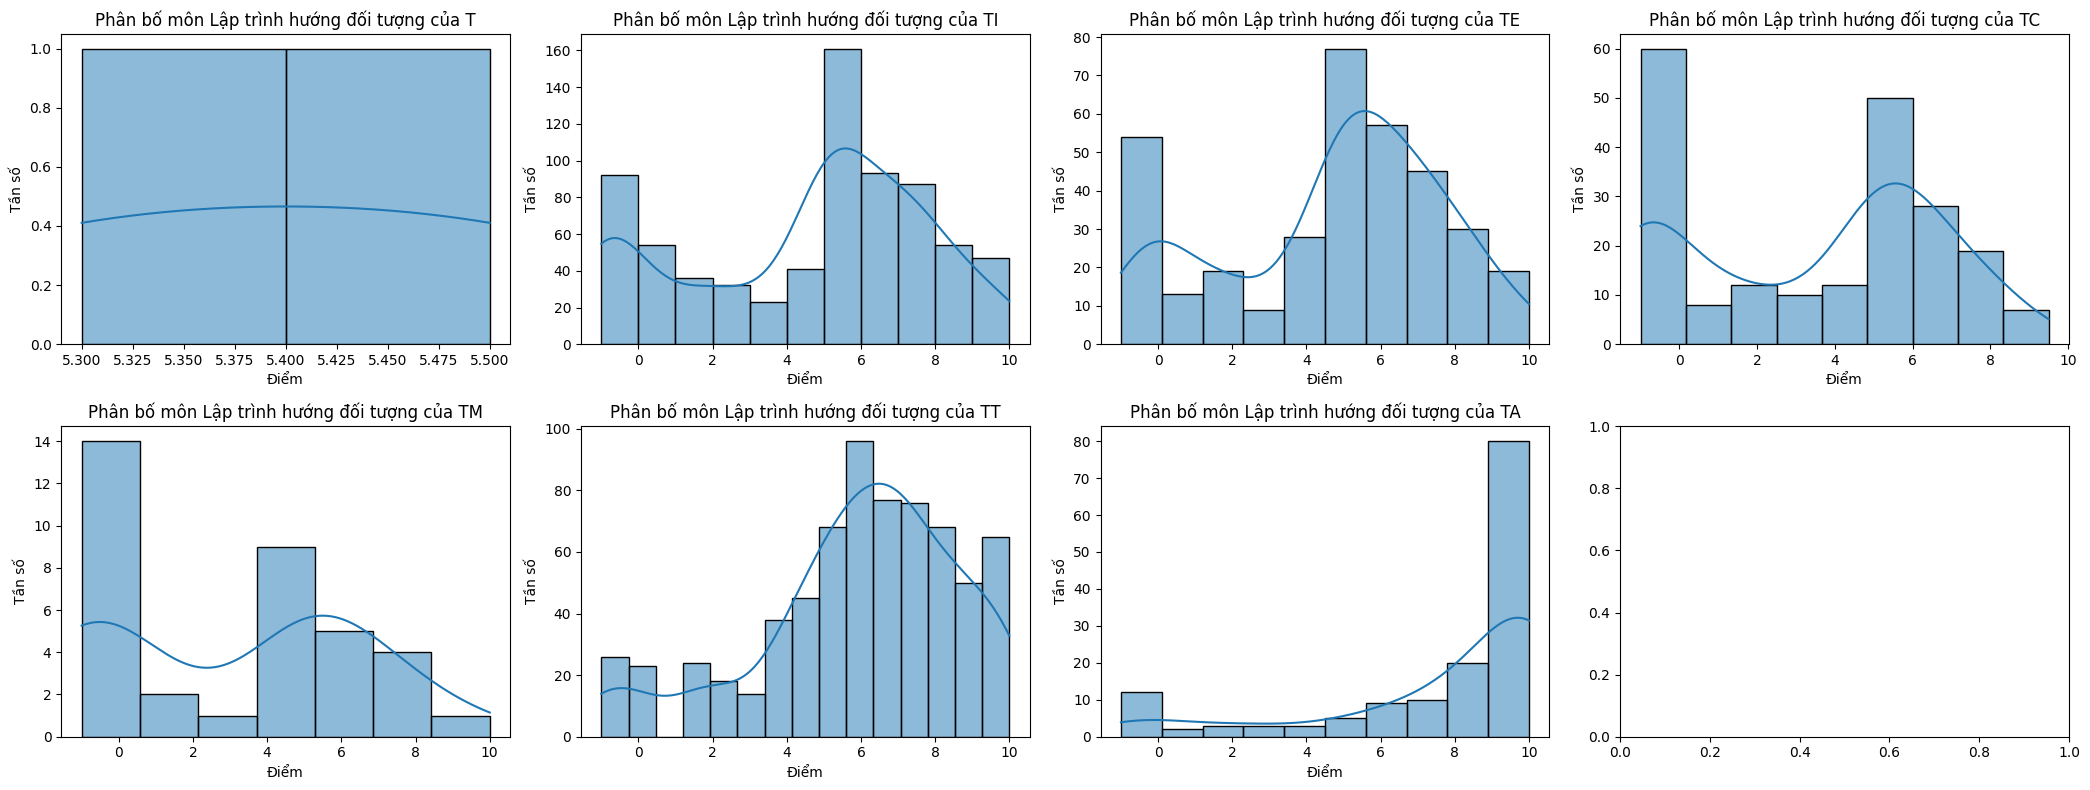

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(21, 8))
axs = axs.ravel()

for i, df in enumerate([T, TI, TE, TC, TM, TT, TA]):
    sns.histplot(df[ (         'Lập trình hướng đối tượng', '3',  'CS122')], ax=axs[i], kde=True)
    axs[i].set_title(f'Phân bố môn Lập trình hướng đối tượng của {cac_nganh[i]}')
    axs[i].set_xlabel('Điểm')
    axs[i].set_ylabel('Tần số')

plt.tight_layout()
plt.show()

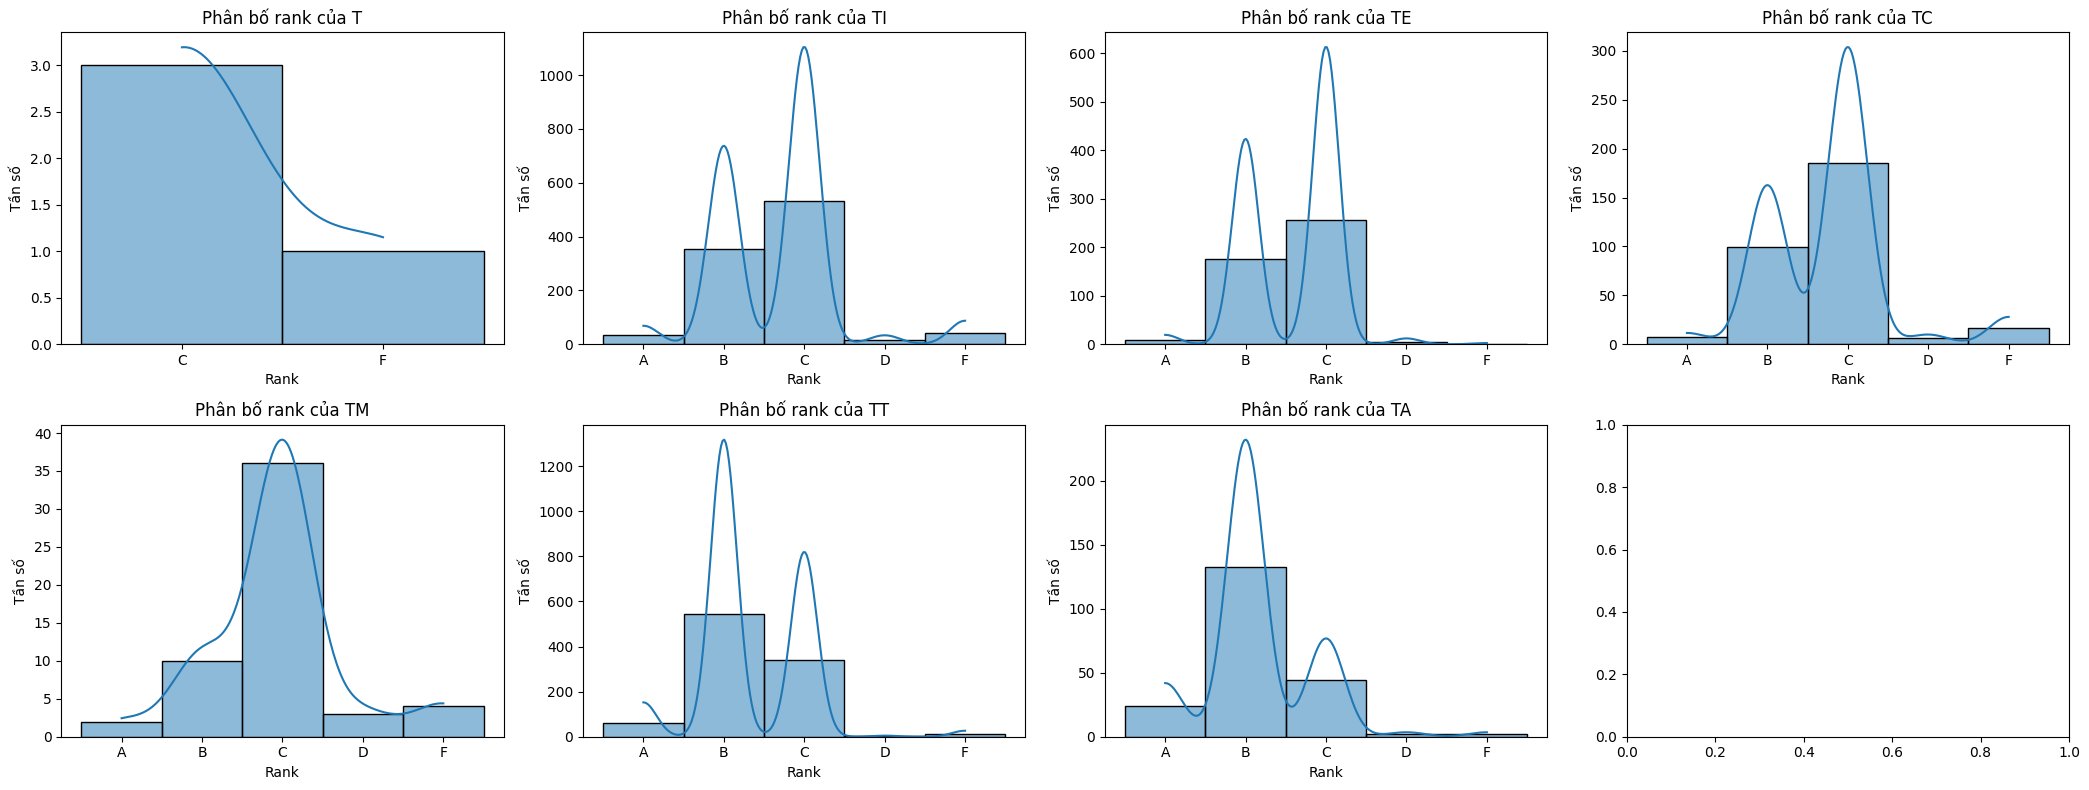

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(21, 8))
axs = axs.ravel()

for i, df in enumerate([T, TI, TE, TC, TM, TT, TA]):
    sns.histplot(df['Grade'], ax=axs[i], kde=True)
    axs[i].set_title(f'Phân bố rank của {cac_nganh[i]}')
    axs[i].set_xlabel('Rank')
    axs[i].set_ylabel('Tần số')

plt.tight_layout()
plt.show()

In [ ]:
cac_nganh

array(['T', 'TI', 'TE', 'TC', 'TM', 'TT', 'TA'], dtype=object)

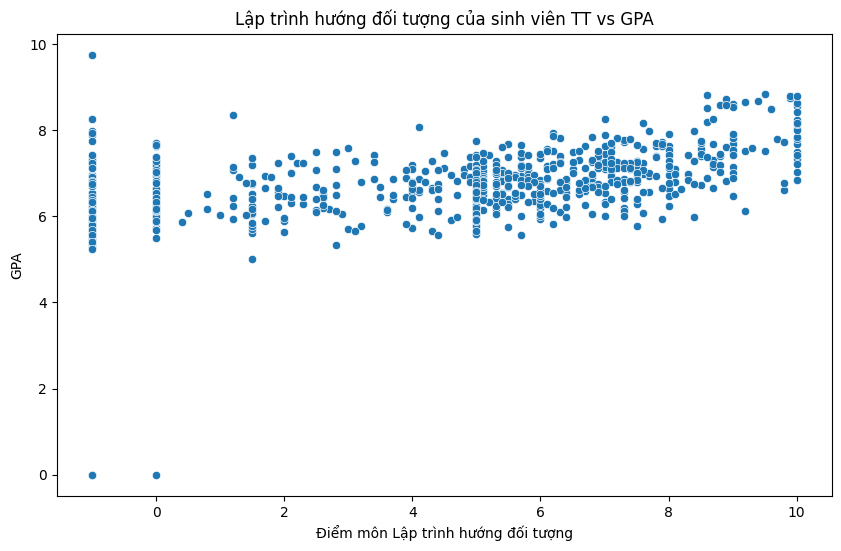

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TI, x=  (         'Lập trình hướng đối tượng', '3',  'CS122'), y='GPA')

plt.title('Lập trình hướng đối tượng của sinh viên TT vs GPA')
plt.xlabel('Điểm môn Lập trình hướng đối tượng')
plt.ylabel('GPA')
plt.show()

### Thêm dữ liệu

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = TT.loc[:,TT.columns[4:]]
y = TT.Grade

X_TI = TI.loc[:,TI.columns[4:]]
y_TI = TI.Grade

X_TE = TE.loc[:,TE.columns[4:]]
y_TE = TE.Grade

X_TC = TC.loc[:,TC.columns[4:]]
y_TC = TC.Grade

X_TM = TM.loc[:,TM.columns[4:]]
y_TM = TM.Grade

X_TA = TA.loc[:,TA.columns[4:]]
y_TA = TA.Grade

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)
X_TI_resampled, y_TI_resampled = ros.fit_resample(X_TI, y_TI)
X_TE_resampled, y_TE_resampled = ros.fit_resample(X_TE, y_TE)
X_TC_resampled, y_TC_resampled = ros.fit_resample(X_TC, y_TC)
X_TM_resampled, y_TM_resampled = ros.fit_resample(X_TM, y_TM)
X_TA_resampled, y_TA_resampled = ros.fit_resample(X_TA, y_TA)





In [ ]:
y_resampled.value_counts()

Grade
A    545
B    545
C    545
D    545
F    545
Name: count, dtype: int64

In [ ]:
X_resampled

Tên HP,Công nghệ phần mềm,Cơ sở dữ liệu,Giáo dục quốc phòng,Khoa học môi trường,Kinh tế chính trị và CNXH khoa học,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,Tiếng Nhật sơ cấp 3,Tiếng Nhật trung cấp 1,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản
Số TC,2,3,4,2,3,3,3,2,3,3,...,4,4,4,4,3,2,3,2,2,2
Mã HP,SE302,IS222,PG121,NA151,ML112,CS325,CS122,NW212,CS315,CS121,...,GJ143,GJ240,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311
0,NaN,8.5,NaN,NaN,NaN,NaN,10.0,NaN,0.0,9.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,8.1,NaN,8.8,NaN,NaN,9.7,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,10.0,NaN,8.4,NaN,NaN,10.0,NaN,NaN,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,9.1,NaN,NaN,NaN,NaN,8.8,NaN,NaN,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,9.0,NaN,8.8,NaN,NaN,10.0,NaN,0.0,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def calculate_gpa(row,data):
    total_grade_points = 0
    total_credits = 0

    for i, value in enumerate(row[1:-2]):
        if value > 4:
            total_grade_points += value * int(data.columns[i+1][1] )
            total_credits += int(data.columns[i+1][1] )

    if total_credits <= 0:
        return 0

    return total_grade_points / total_credits

In [ ]:
calculate_gpa(X_resampled.iloc[2031],X_resampled)

5.1625

In [ ]:
y_resampled[2031]

'D'

In [ ]:
bang3 = pd.read_csv('bang3.csv')
bang3

,Khóa,Mã HP,Tên HP,Số TC,Ngành,Kiểu môn
0,24,MA102,Toán cơ sở,3,TI,1
1,24,CS100,Tin đại cương,2,TI,1
2,24,MA110,Giải tích 1,3,TI,1
3,24,MA111,Giải tích 2,3,TI,1
4,24,MA120,Đại số tuyến tính,3,TI,1
...,...,...,...,...,...,...
1215,32,IP403,Thực tập ngành Hệ thống thông tin,2,TE,1
1216,32,IS499,KLTN ngành Hệ thống thông tin,6,TE,1
1217,32,IS484,CĐTN: Cơ sở dữ liệu,6,TE,1
1218,32,NW439,CĐTN: An toàn mạng,6,TE,1


In [ ]:
bang3.Khóa.value_counts()

Khóa
32    183
27    159
30    137
31    137
28    132
29    129
26    122
24    114
25    107
Name: count, dtype: int64

In [ ]:
TA.columns[np.where(TA.columns.get_level_values('Mã HP')=='AI485')]

MultiIndex([('CĐTN: Ngành Trí tuệ nhân tạo', '6', 'AI485')],
           names=['Tên HP', 'Số TC', 'Mã HP'])

In [ ]:
for i in ['Toán rời rạc','Cấu trúc dữ liệu','Ngôn ngữ lập trình','Kỹ thuật số' ,'Lập trình hướng đối tượng','Kiến trúc máy tính','Cơ sở dữ liệu','Mạng máy tính','Phân tích và thiết kế thuật toán','Thống kê nâng cao','Các công cụ lập trình trí tuệ nhân tạo','Học máy','Học sâu','Hệ thống thông tin' ,'Trí tuệ nhân tạo và công nghệ tri thức','An toàn thông tin','Dữ liệu lớn','Xử lý ngôn ngữ tự nhiên','Thị giác máy tính','Thực tập ngành Trí tuệ nhân tạo','KLTN ngành Trí tuệ nhân tạo','CĐTN: Ngành Trí tuệ nhân tạo']:
  print(TA.columns[np.where(TA.columns.get_level_values('Tên HP')== i )].get_level_values('Số TC')[0],",")


3 ,
3 ,
3 ,
2 ,
3 ,
3 ,
3 ,
2 ,
2 ,
3 ,
3 ,
3 ,
3 ,
3 ,
3 ,
3 ,
2 ,
3 ,
3 ,
3 ,
6 ,
6 ,


In [ ]:
#TA
cot_tenmon = ['Logic, suy luận toán học và kỹ thuật đếm','Tin đại cương','Giải tích 1','Giải tích 2','Đại số tuyến tính','Xác suất','Thống Kê','Tối ưu hóa','Toán rời rạc','Cấu trúc dữ liệu','Ngôn ngữ lập trình','Kỹ thuật số'
             ,'Lập trình hướng đối tượng','Kiến trúc máy tính','Cơ sở dữ liệu','Mạng máy tính','Phân tích và thiết kế thuật toán','Thống kê nâng cao','Các công cụ lập trình trí tuệ nhân tạo','Học máy','Học sâu','Hệ thống thông tin'
             ,'Trí tuệ nhân tạo và công nghệ tri thức','An toàn thông tin','Dữ liệu lớn','Xử lý ngôn ngữ tự nhiên','Thị giác máy tính','Thực tập ngành Trí tuệ nhân tạo','KLTN ngành Trí tuệ nhân tạo','CĐTN: Ngành Trí tuệ nhân tạo']

cot_ma    =  ['MA101','CS100','MA110','MA111','MA120','MA230','MA234','MI302', 'MI201' ,'CF212' ,'CS121' ,'CS110' ,'CS122' ,'CS212' ,'IS222' ,'NW212' ,'CF211'
              ,'MA238' ,'AI220' ,'CS320' ,'AI310' ,'IS314' ,'MI322' ,'IS345' ,'IS330' ,'AI320' ,'AI321' ,'IP405' ,'AI499' ,'AI485']

cot_tin   =  [3, 2, 3, 3, 3, 3, 2, 2, 3 ,3 ,3 ,2 ,3 ,3 ,3 ,2 ,2 ,3 ,3 ,3 ,3 ,3 ,3 ,3 ,2 ,3 ,3 ,3 ,6 ,6 ]
cot_nganh =  ['TA'] * len(cot_tin)
cot_khoa  =  [33] * len(cot_tin)
cot_kieu  =  [1] * len(cot_tin)

In [ ]:
bang3_TA = pd.DataFrame({'Khóa':cot_khoa,'Mã HP':cot_ma,'Tên HP':cot_tenmon,'Số TC':cot_tin,'Ngành':cot_nganh,'Kiểu môn':cot_kieu})

In [ ]:
bang3_tonghop = pd.concat([bang3,bang3_TA]).reset_index(drop=True)

In [ ]:
bang3_tonghop

,Khóa,Mã HP,Tên HP,Số TC,Ngành,Kiểu môn
0,24,MA102,Toán cơ sở,3,TI,1
1,24,CS100,Tin đại cương,2,TI,1
2,24,MA110,Giải tích 1,3,TI,1
3,24,MA111,Giải tích 2,3,TI,1
4,24,MA120,Đại số tuyến tính,3,TI,1
...,...,...,...,...,...,...
1245,33,AI320,Xử lý ngôn ngữ tự nhiên,3,TA,1
1246,33,AI321,Thị giác máy tính,3,TA,1
1247,33,IP405,Thực tập ngành Trí tuệ nhân tạo,3,TA,1
1248,33,AI499,KLTN ngành Trí tuệ nhân tạo,6,TA,1


# Huấn luyện


## TA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TA_resampled.fillna(-1), y_TA_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.9548872180451128

In [ ]:
feature_importances = rfc.feature_importances_

important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X_TA_resampled.columns[important_features_indices]

f_impo = []
v_impo = []
print("Các đặc trưng quan trọng theo thứ tự:")
for feature, importance in zip(important_features, feature_importances[important_features_indices]):
    if feature[2] in list(bang3_TA['Mã HP']):
      print(f"{feature}: {importance:.4f}")
      f_impo.append(feature)
      v_impo.append(importance)


Các đặc trưng quan trọng theo thứ tự:
('Logic, suy luận toán học và kỹ thuật đếm', '3', 'MA101'): 0.0930
('Tin đại cương', '2', 'CS100'): 0.0701
('Đại số tuyến tính', '3', 'MA120'): 0.0366
('Cơ sở dữ liệu', '3', 'IS222'): 0.0253
('Lập trình hướng đối tượng', '3', 'CS122'): 0.0195
('Ngôn ngữ lập trình', '3', 'CS121'): 0.0184
('Giải tích 1', '3', 'MA110'): 0.0148
('Thống kê nâng cao', '3', 'MA238'): 0.0129
('Học máy', '3', 'CS320'): 0.0126
('Toán rời rạc', '3', 'MI201'): 0.0116
('Cấu trúc dữ liệu', '3', 'CF212'): 0.0092
('Kiến trúc máy tính', '3', 'CS212'): 0.0086
('Kỹ thuật số', '2', 'CS110'): 0.0073
('Các công cụ lập trình trí tuệ nhân tạo', '3', 'AI220'): 0.0060
('Tối ưu hóa', '2', 'MI302'): 0.0038
('Học sâu', '3', 'AI310'): 0.0033
('Mạng máy tính', '2', 'NW212'): 0.0029
('Trí tuệ nhân tạo và công nghệ tri thức', '3', 'MI322'): 0.0018
('Thị giác máy tính', '3', 'AI321'): 0.0014
('Thực tập ngành Trí tuệ nhân tạo', '3', 'IP405'): 0.0014
('Giải tích 2', '3', 'MA111'): 0.0013
('Thống Kê',

In [ ]:
ten = [f[0] for f in f_impo]
ma = [f[1] for f in f_impo]
tin = [f[2] for f in f_impo]
imp = [v for v in v_impo]

imp_TA = pd.DataFrame({
    'Môn Học':ten,
    'Số tín chỉ':tin,
    'Mã HP':ma,
    'Độ quan trọng':imp

})
imp_TA

,Môn Học,Số tín chỉ,Mã HP,Độ quan trọng
0,"Logic, suy luận toán học và kỹ thuật đếm",MA101,3,0.092992
1,Tin đại cương,CS100,2,0.070062
2,Đại số tuyến tính,MA120,3,0.036642
3,Cơ sở dữ liệu,IS222,3,0.025255
4,Lập trình hướng đối tượng,CS122,3,0.019455
5,Ngôn ngữ lập trình,CS121,3,0.018419
6,Giải tích 1,MA110,3,0.014768
7,Thống kê nâng cao,MA238,3,0.012908
8,Học máy,CS320,3,0.012607
9,Toán rời rạc,MI201,3,0.011636


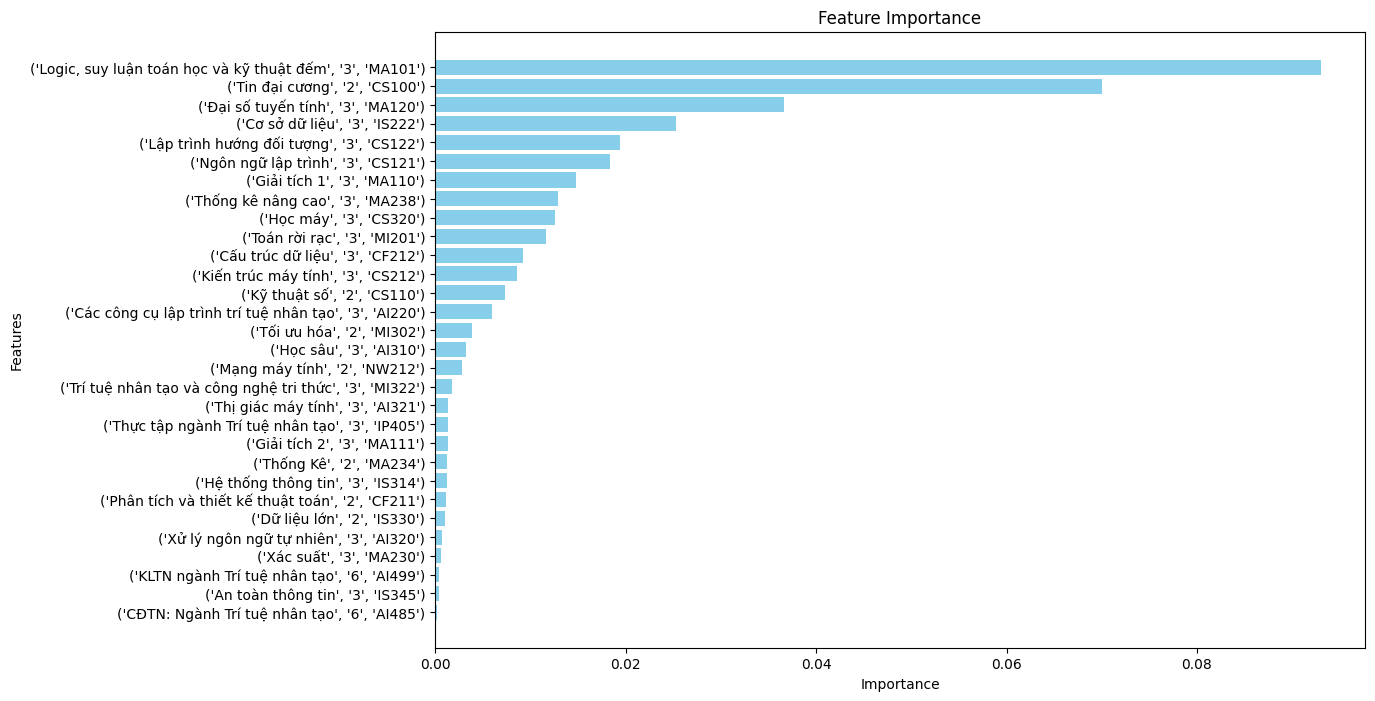

In [ ]:
f_impo_str = [str(f) for f in f_impo]

plt.figure(figsize=(12, 8))
plt.barh(f_impo_str, v_impo, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10)

print("Cross-validation scores:", cv_scores)


Cross-validation scores: [1.         0.98148148 0.94339623 0.98113208 0.96226415 0.96226415
 0.98113208 0.94339623 0.98113208 1.        ]


## TI

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TI_resampled.fillna(-1), y_TI_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.9473684210526315

In [ ]:
feature_importances = rfc.feature_importances_

important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X_TI_resampled.columns[important_features_indices]
f_impo = []
v_impo = []
print("Các đặc trưng quan trọng theo thứ tự:")
for feature, importance in zip(important_features, feature_importances[important_features_indices]):
    if feature[2] in list(bang3.loc[bang3['Ngành']=='TI'].loc[bang3['Kiểu môn']==1]['Mã HP']):
      print(f"{feature}: {importance:.4f}")
      f_impo.append(feature)
      v_impo.append(importance)

Các đặc trưng quan trọng theo thứ tự:
('Tin đại cương', '2', 'CS100'): 0.0750
('Logic, suy luận toán học và kỹ thuật đếm', '3', 'MA101'): 0.0567
('Ngôn ngữ lập trình', '3', 'CS121'): 0.0355
('Lập trình hướng đối tượng', '3', 'CS122'): 0.0202
('Kỹ thuật số', '2', 'CS110'): 0.0166
('Đại số tuyến tính', '3', 'MA120'): 0.0132
('Kiến trúc máy tính', '3', 'CS212'): 0.0128
('Cơ sở dữ liệu', '3', 'IS222'): 0.0118
('Nguyên lý hệ điều hành', '3', 'CS315'): 0.0096
('Giải tích 1', '3', 'MA110'): 0.0095
('Toán rời rạc', '3', 'MI201'): 0.0086
('Hệ quản trị cơ sở dữ liệu', '3', 'IS322'): 0.0083
('Cấu trúc dữ liệu', '3', 'CF212'): 0.0066
('Toán cơ sở', '3', 'MA102'): 0.0061
('Phân tích thiết kế hướng đối tượng', '3', 'IS332'): 0.0059
('Nhập môn khoa học dữ liệu', '2', 'CS321'): 0.0058
('Mạng máy tính', '2', 'NW212'): 0.0057
('Số và cấu trúc đại số', '3', 'MA104'): 0.0055
('Xác suất thống kê ứng dụng', '4', 'MA231'): 0.0049
('Hệ thống thông tin', '3', 'IS314'): 0.0047
('Giải tích 2', '3', 'MA111'): 0.0

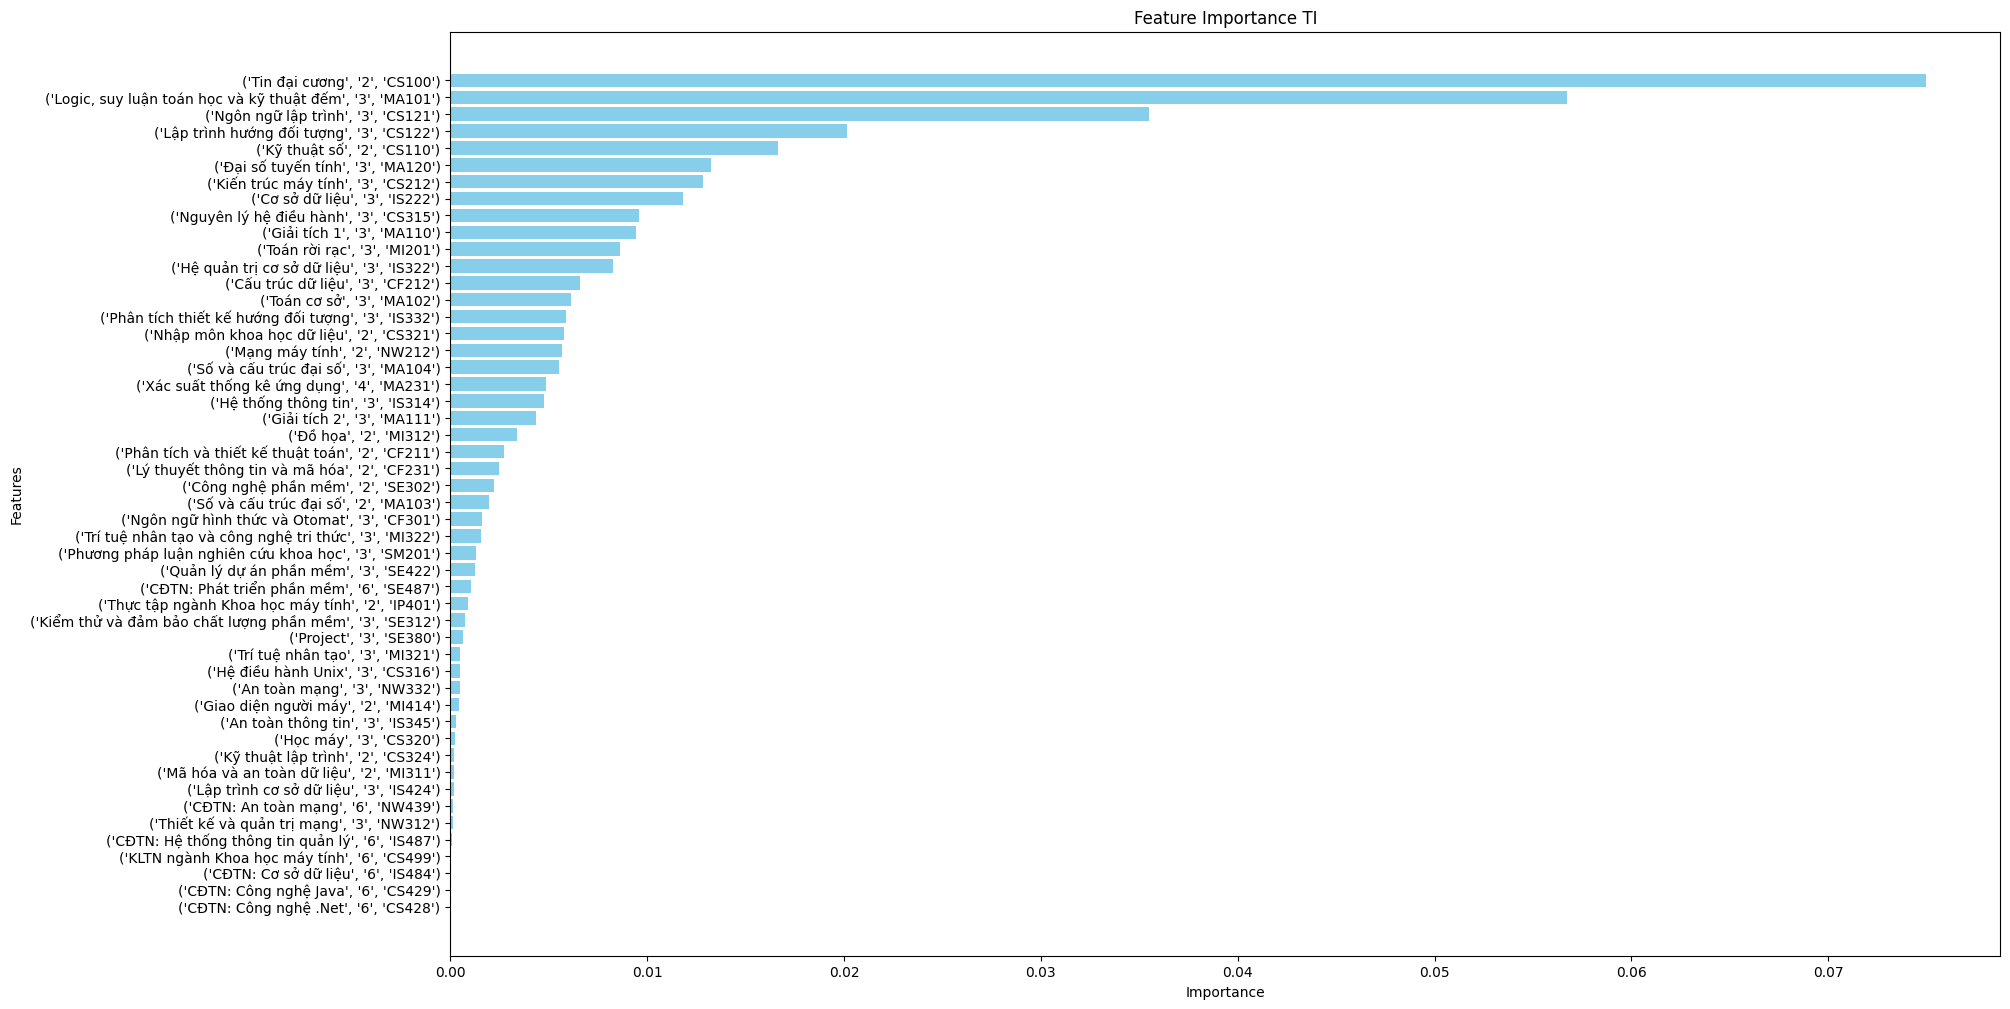

In [ ]:
f_impo_str = [str(f) for f in f_impo]

plt.figure(figsize=(20,12))
plt.barh(f_impo_str, v_impo, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance TI')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.94835681 0.94835681 0.94131455 0.94823529 0.95058824]


## TE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TE_resampled.fillna(-1), y_TE_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.9568627450980393

In [ ]:
feature_importances = rfc.feature_importances_

important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X_TE_resampled.columns[important_features_indices]

f_impo = []
v_impo = []
print("Các đặc trưng quan trọng theo thứ tự:")
for feature, importance in zip(important_features, feature_importances[important_features_indices]):
    if feature[2] in list(bang3.loc[bang3['Ngành']=='TE'].loc[bang3['Kiểu môn']==1]['Mã HP']):
      print(f"{feature}: {importance:.4f}")
      f_impo.append(feature)
      v_impo.append(importance)

Các đặc trưng quan trọng theo thứ tự:
('Logic, suy luận toán học và kỹ thuật đếm', '3', 'MA101'): 0.0448
('Tin đại cương', '2', 'CS100'): 0.0426
('Lập trình hướng đối tượng', '3', 'CS122'): 0.0405
('Ngôn ngữ lập trình', '3', 'CS121'): 0.0294
('Cơ sở dữ liệu', '3', 'IS222'): 0.0265
('Mạng máy tính', '2', 'NW212'): 0.0180
('Kỹ thuật số', '2', 'CS110'): 0.0171
('Đại số tuyến tính', '3', 'MA120'): 0.0117
('Phân tích thiết kế hướng đối tượng', '3', 'IS332'): 0.0113
('Hệ quản trị cơ sở dữ liệu', '3', 'IS322'): 0.0095
('Giải tích 2', '3', 'MA111'): 0.0085
('Công nghệ phần mềm', '2', 'SE302'): 0.0079
('Kiến trúc máy tính', '3', 'CS212'): 0.0075
('Số và cấu trúc đại số', '3', 'MA104'): 0.0067
('Toán rời rạc', '3', 'MI201'): 0.0059
('Nguyên lý hệ điều hành', '3', 'CS315'): 0.0053
('Cấu trúc dữ liệu', '3', 'CF212'): 0.0051
('Giải tích 1', '3', 'MA110'): 0.0044
('Hệ thống thông tin', '3', 'IS314'): 0.0032
('CĐTN: Phát triển phần mềm', '6', 'SE487'): 0.0030
('Xác suất thống kê ứng dụng', '4', 'MA23

In [ ]:
ten = [f[0] for f in f_impo]
ma = [f[1] for f in f_impo]
tin = [f[2] for f in f_impo]
imp = [v for v in v_impo]

imp_TE = pd.DataFrame({
    'Môn Học':ten,
    'Số tín chỉ':tin,
    'Mã HP':ma,
    'Độ quan trọng':imp

})
imp_TE.to_csv('imp_TE.csv')

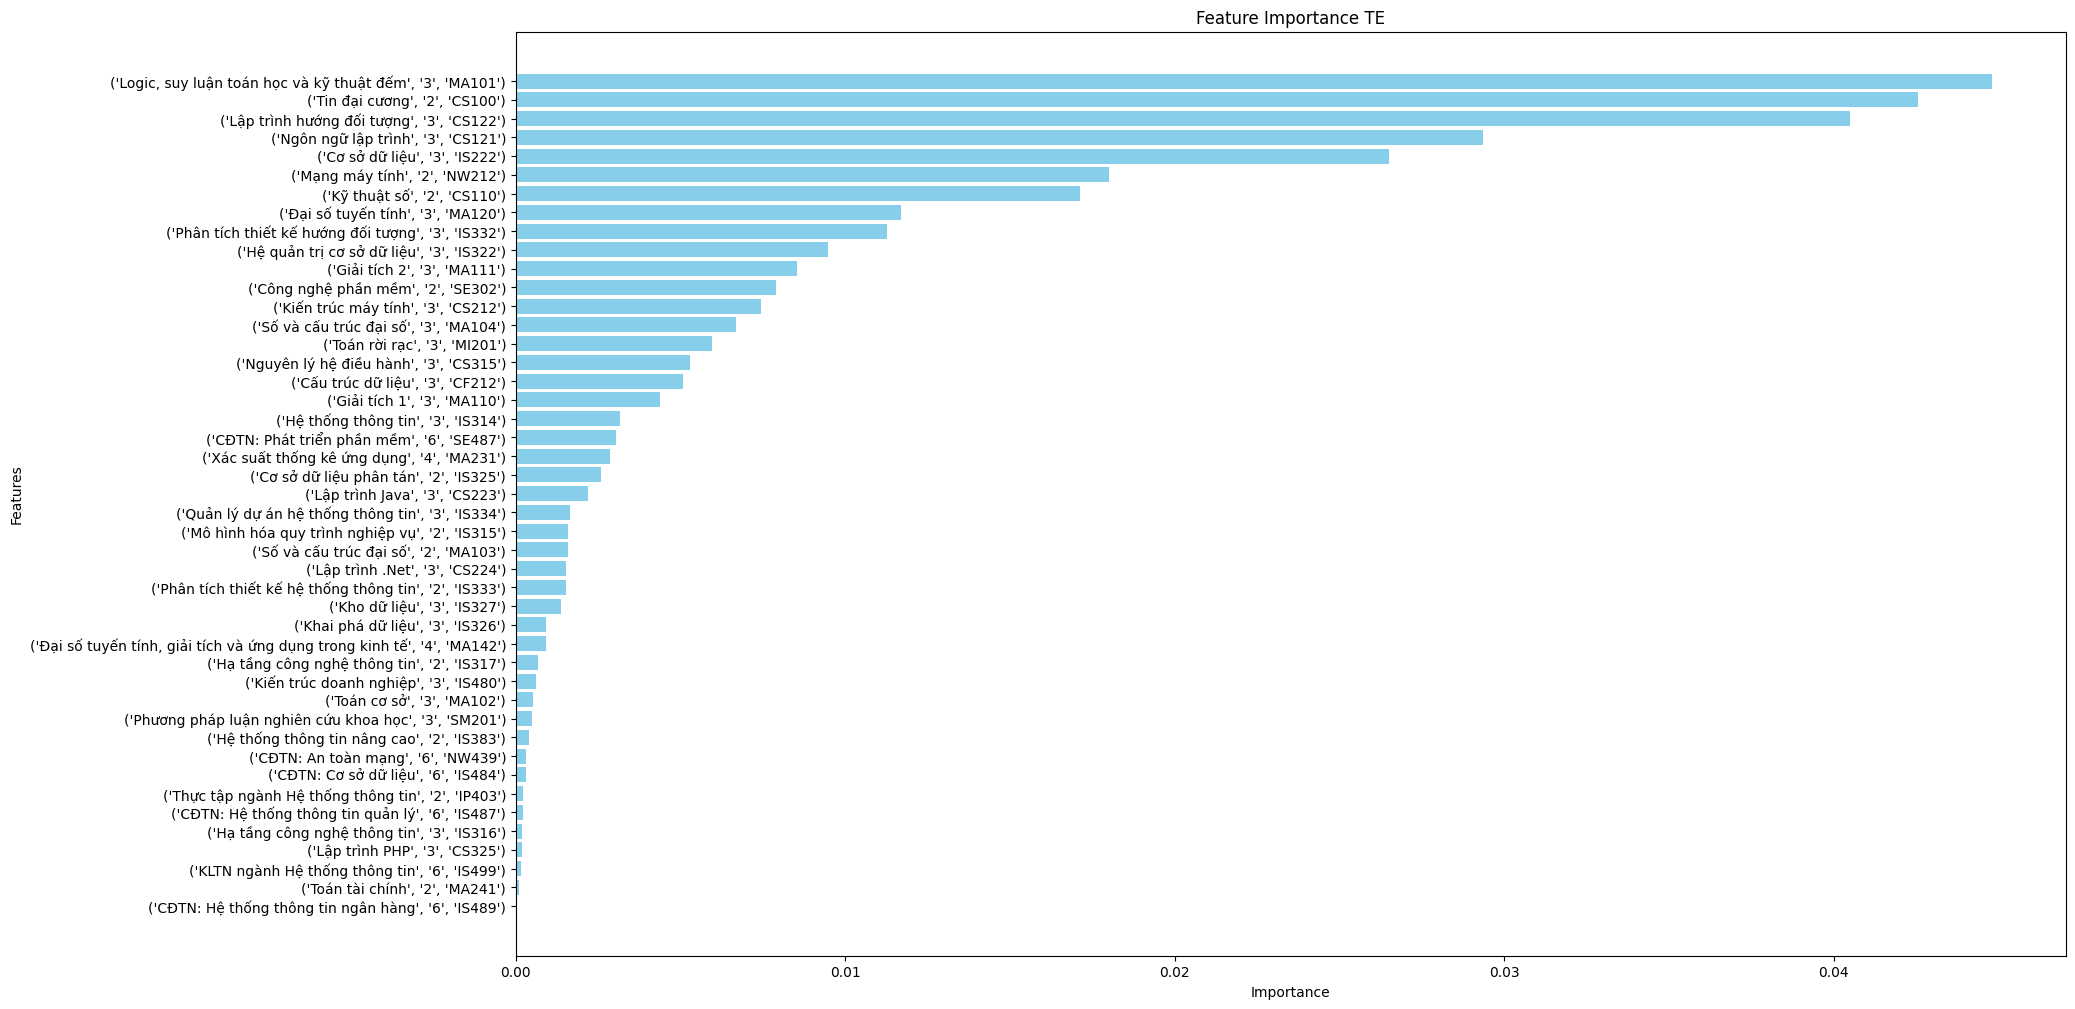

In [ ]:
f_impo_str = [str(f) for f in f_impo]

plt.figure(figsize=(20, 12))
plt.barh(f_impo_str, v_impo, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance TE')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.98039216 0.96568627 0.96078431 0.90196078 0.93627451]


## TC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TC_resampled.fillna(-1), y_TC_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.9351351351351351

In [ ]:
feature_importances = rfc.feature_importances_

important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X_TC_resampled.columns[important_features_indices]

v_impo = []
f_impo = []
print("Các đặc trưng quan trọng theo thứ tự:")
for feature, importance in zip(important_features, feature_importances[important_features_indices]):
    if feature[2] in list(bang3.loc[bang3['Ngành']=='TC'].loc[bang3['Kiểu môn']==1]['Mã HP']):
      print(f"{feature}: {importance:.4f}")
      v_impo.append(importance)
      f_impo.append(feature)

Các đặc trưng quan trọng theo thứ tự:
('Tin đại cương', '2', 'CS100'): 0.0562
('Logic, suy luận toán học và kỹ thuật đếm', '3', 'MA101'): 0.0477
('Ngôn ngữ lập trình', '3', 'CS121'): 0.0377
('Kỹ thuật số', '2', 'CS110'): 0.0158
('Đại số tuyến tính', '3', 'MA120'): 0.0130
('Lập trình hướng đối tượng', '3', 'CS122'): 0.0126
('Cơ sở dữ liệu', '3', 'IS222'): 0.0084
('Toán cơ sở', '3', 'MA102'): 0.0082
('Mạng máy tính', '2', 'NW212'): 0.0060
('Kiến trúc máy tính', '3', 'CS212'): 0.0052
('Toán rời rạc', '3', 'MI201'): 0.0046
('Giải tích 1', '3', 'MA110'): 0.0046
('Nguyên lý hệ điều hành', '3', 'CS315'): 0.0038
('Xác suất thống kê ứng dụng', '4', 'MA231'): 0.0029
('Số và cấu trúc đại số', '3', 'MA104'): 0.0026
('Kỹ thuật truyền tin', '3', 'TC311'): 0.0025
('Số và cấu trúc đại số', '2', 'MA103'): 0.0020
('Kỹ thuật kết nối mạng', '3', 'TC314'): 0.0019
('Mô hình hóa và mô phỏng', '3', 'TC300'): 0.0019
('Lý thuyết thông tin và mã hóa', '2', 'CF231'): 0.0018
('Giải tích 2', '3', 'MA111'): 0.0017
(

In [ ]:
ten = [f[0] for f in f_impo]
ma = [f[1] for f in f_impo]
tin = [f[2] for f in f_impo]
imp = [v for v in v_impo]

imp_TC = pd.DataFrame({
    'Môn Học':ten,
    'Số tín chỉ':tin,
    'Mã HP':ma,
    'Độ quan trọng':imp

})
imp_TC.to_csv('imp_TC.csv')

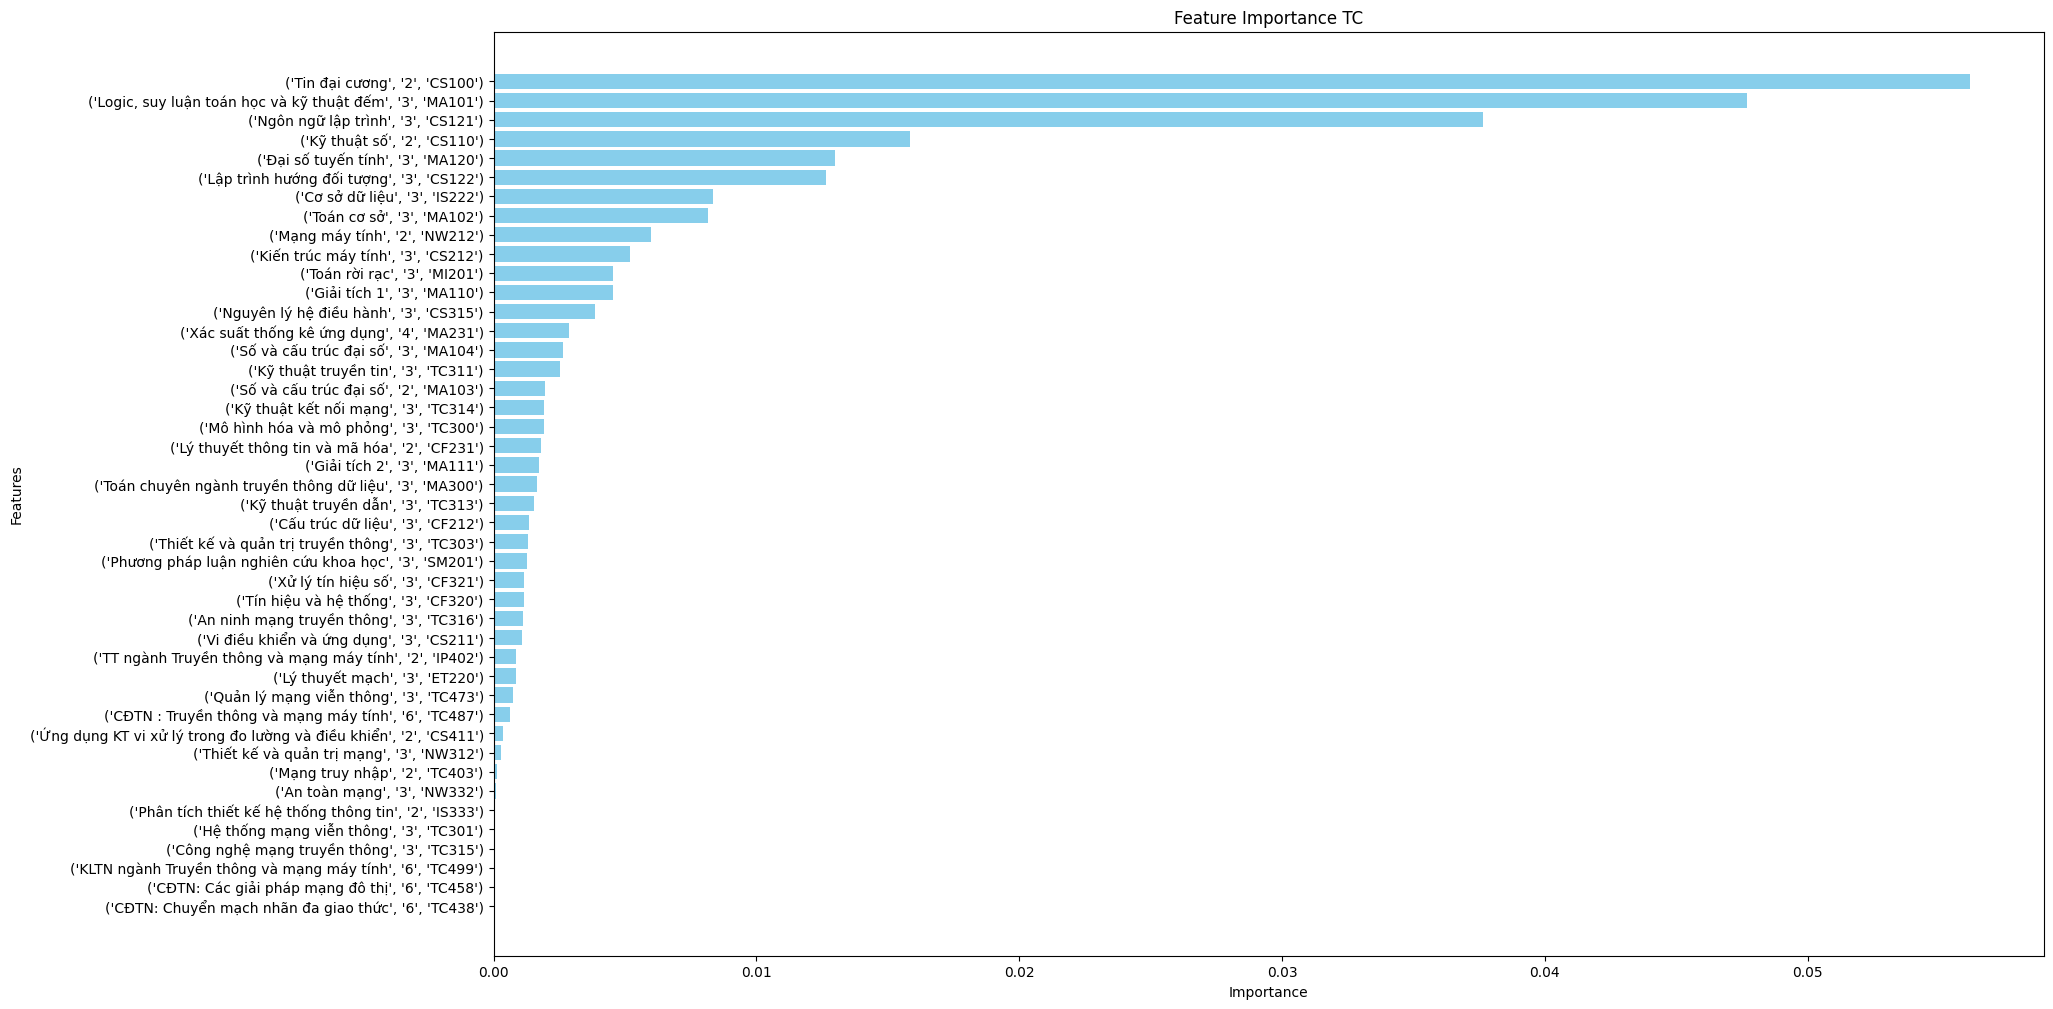

In [ ]:
f_impo_str_TC = [str(f) for f in f_impo]

plt.figure(figsize=(20, 12))
plt.barh(f_impo_str_TC, v_impo, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance TC')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.97972973 0.91891892 0.96621622 0.9527027  0.93243243]


## TT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled.fillna(-1), y_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.9669724770642202

In [ ]:
feature_importances = rfc.feature_importances_

important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X_resampled.columns[important_features_indices]

f_name_TT = []
i_value_TT = []
print("Các đặc trưng quan trọng theo thứ tự:")
for feature, importance in zip(important_features, feature_importances[important_features_indices]):
    if feature[2] in list(bang3.loc[bang3['Ngành']=='TT'].loc[bang3['Kiểu môn']==1]['Mã HP']):
      print(f"{feature}: {importance:.4f}")
      f_name_TT.append(feature)
      i_value_TT.append(importance)


Các đặc trưng quan trọng theo thứ tự:
('Logic, suy luận toán học và kỹ thuật đếm', '3', 'MA101'): 0.0881
('Tin đại cương', '2', 'CS100'): 0.0685
('Cơ sở dữ liệu', '3', 'IS222'): 0.0481
('Ngôn ngữ lập trình', '3', 'CS121'): 0.0462
('Kiến trúc máy tính', '3', 'CS212'): 0.0381
('Đại số tuyến tính', '3', 'MA120'): 0.0374
('Lập trình hướng đối tượng', '3', 'CS122'): 0.0266
('Số và cấu trúc đại số', '3', 'MA104'): 0.0257
('Giải tích 1', '3', 'MA110'): 0.0172
('Kỹ thuật số', '2', 'CS110'): 0.0146
('Toán rời rạc', '3', 'MI201'): 0.0106
('Giải tích 2', '3', 'MA111'): 0.0102
('Hệ quản trị cơ sở dữ liệu', '3', 'IS322'): 0.0088
('Mạng máy tính', '2', 'NW212'): 0.0058
('Cấu trúc dữ liệu', '3', 'CF212'): 0.0049
('Hệ thống thông tin', '3', 'IS314'): 0.0045
('Lập trình ứng dụng di động', '2', 'CS314'): 0.0044
('Dữ liệu lớn', '2', 'IS330'): 0.0036
('Trí tuệ nhân tạo và công nghệ tri thức', '3', 'MI322'): 0.0034
('Phân tích thiết kế hướng đối tượng', '3', 'IS332'): 0.0033
('Xác suất thống kê ứng dụng', 

In [ ]:
ten = [f[0] for f in f_name_TT]
ma = [f[1] for f in f_name_TT]
tin = [f[2] for f in f_name_TT]
imp = [v for v in i_value_TT]

imp_TT = pd.DataFrame({
    'Môn Học':ten,
    'Số tín chỉ':tin,
    'Mã HP':ma,
    'Độ quan trọng':imp

})
imp_TT.to_csv('imp_TT.csv')

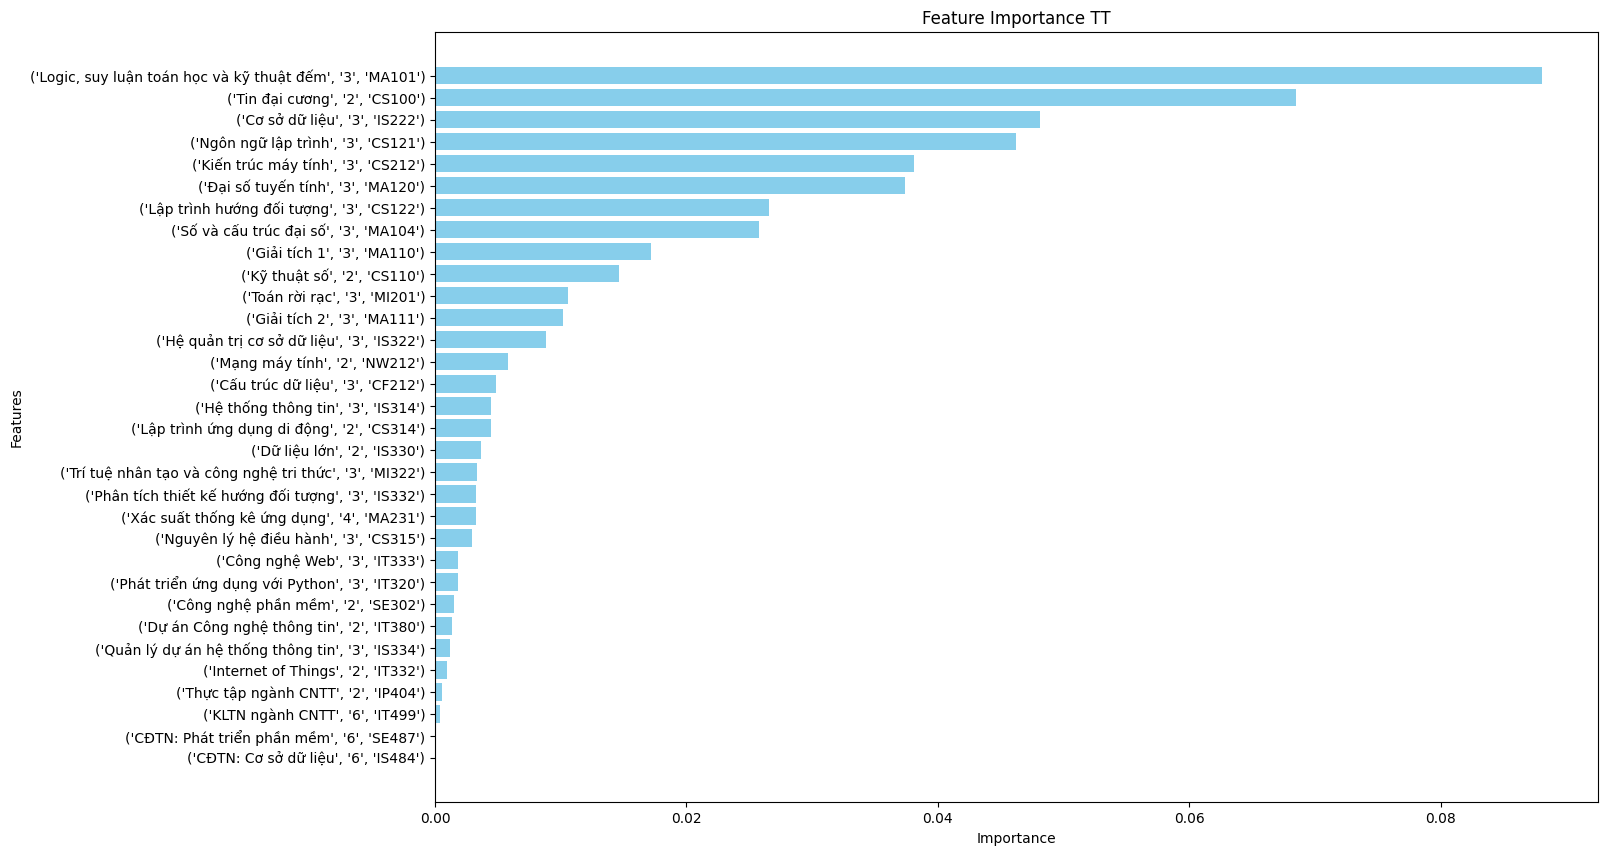

In [ ]:
f_name_TT_str = [str(f) for f in f_name_TT]

plt.figure(figsize=(15, 10))
plt.barh(f_name_TT_str, i_value_TT, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance TT')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.95642202 0.95642202 0.95183486 0.95412844 0.93119266]


##TM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TM_resampled.fillna(-1), y_TM_resampled, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.9722222222222222

In [ ]:
feature_importances = rfc.feature_importances_

important_features_indices = np.argsort(feature_importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
important_features = X_TM_resampled.columns[important_features_indices]

f_name_TM = []
i_value_TM = []
print("Các đặc trưng quan trọng theo thứ tự:")
for feature, importance in zip(important_features, feature_importances[important_features_indices]):
    if feature[2] in list(bang3.loc[bang3['Ngành']=='TM'].loc[bang3['Kiểu môn']==1]['Mã HP']):
      print(f"{feature}: {importance:.4f}")
      f_name_TM.append(feature)
      i_value_TM.append(importance)

Các đặc trưng quan trọng theo thứ tự:
('Đại số tuyến tính', '3', 'MA120'): 0.0298
('Ngôn ngữ lập trình', '3', 'CS121'): 0.0267
('Tin đại cương', '2', 'CS100'): 0.0179
('Giải tích 1', '3', 'MA110'): 0.0163
('Toán rời rạc', '3', 'MI201'): 0.0140
('Cơ sở dữ liệu', '3', 'IS222'): 0.0106
('Lập trình hướng đối tượng', '3', 'CS122'): 0.0105
('Logic, suy luận toán học và kỹ thuật đếm', '3', 'MA101'): 0.0090
('Mạng máy tính', '2', 'NW212'): 0.0054
('KLTN: Toán ứng dụng', '6', 'MI489'): 0.0049
('Hàm biến phức', '2', 'MA313'): 0.0032
('Giải tích 2', '3', 'MA111'): 0.0032
('Nguyên lý hệ điều hành', '3', 'CS315'): 0.0031
('Lý thuyết thuật toán', '3', 'CF201'): 0.0027
('Cấu trúc dữ liệu', '3', 'CF212'): 0.0022
('Số và cấu trúc đại số', '2', 'MA103'): 0.0022
('Xác suất thống kê ứng dụng', '4', 'MA231'): 0.0018
('Hệ thống hỗ trợ tính toán', '2', 'MI331'): 0.0018
('Số học thuật toán', '2', 'MA323'): 0.0013
('Giải tích số', '3', 'MA340'): 0.0013
('Hệ thống TEX', '2', 'CF303'): 0.0011
('Chuyên đề cơ sở d

In [ ]:
ten = [f[0] for f in f_name_TM]
ma = [f[1] for f in f_name_TM]
tin = [f[2] for f in f_name_TM]
imp = [v for v in i_value_TM]

imp_TM = pd.DataFrame({
    'Môn Học':ten,
    'Số tín chỉ':tin,
    'Mã HP':ma,
    'Độ quan trọng':imp

})
imp_TM.to_csv('imp_TM.csv')

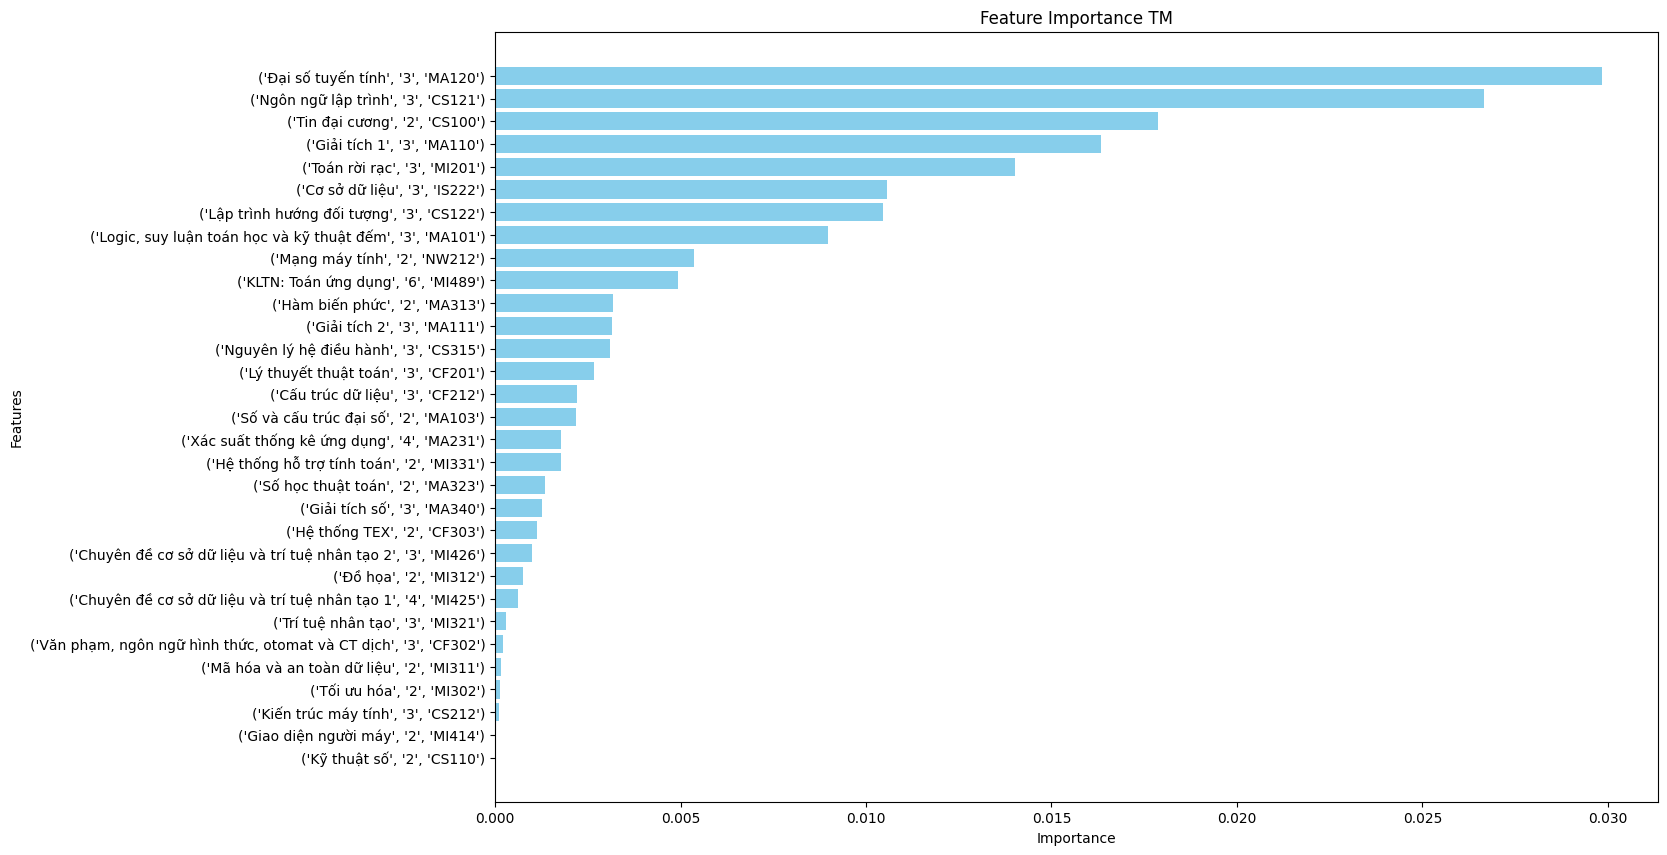

In [ ]:
f_name_TM_str = [str(f) for f in f_name_TM]

plt.figure(figsize=(15, 10))
plt.barh(f_name_TM_str, i_value_TM, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance TM')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

Cross-validation scores: [1.         1.         1.         0.89655172 0.89285714]
